# kaggle score: 0.77033

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
submit = pd.DataFrame(columns=["Id","Action"])

In [2]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train.shape)
print(test.shape) #test dataset does not have survived(target) column hence 11 columns

(891, 12)
(418, 11)


In [5]:
train.info()
#it seems to have a lot of null value in age and cabin column and just 2 in embarked column

#knowing the columns

#survival(target): categorical-yes/no
#pclass: ticket class, categorical-ordinal, (1st = Upper, 2nd = Middle, 3rd = Lower), A proxy for socio-economic status
#sex: categorical, nominal
#age: numerical - Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
#sibsp: no. of sibbling/spouses
#parch: no. of parents/children - Some children travelled only with a nanny, therefore parch=0 for them.
#ticket number
#passenger fare
#cabin number
#embarked: categorical, multinominal- C = Cherbourg, Q = Queenstown, S = Southampton

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()
#and in test dataset we have missing values in age and cabin and just 1 missing value in fare column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
print("training set:")
print(train.isnull().sum())
print("----------------------")
print("testing set:")
print(test.isnull().sum())

training set:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------
testing set:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Treating missing values
## Note:
**Any imputations made in the test set will be solely based on the training set**.

Replacing 2 missing values in train set by maximum label in enbarked column with maximum frequency

In [8]:
train['Embarked'].fillna(value=train['Embarked'].value_counts().index[0],inplace=True,axis=0)
print(train['Embarked'].isnull().sum())

0


Now we will replace the Nan values in age column based on the following groups:<br>
eg: all females,embarked at C,having class1 ticket have an average age of 37, hence Nan values in age having this group(combination of sex,embarked and class) will be replaced by 37

In [9]:
g = train.groupby(by=['Sex','Embarked','Pclass']).mean().reset_index()[['Age','Sex','Embarked','Pclass']]
g

,Age,Sex,Embarked,Pclass
0,36.052632,female,C,1
1,19.142857,female,C,2
2,14.062500,female,C,3
3,33.000000,female,Q,1
4,30.000000,female,Q,2
5,22.850000,female,Q,3
6,33.456522,female,S,1
7,29.719697,female,S,2
8,23.223684,female,S,3
9,40.111111,male,C,1


In [10]:
def mean_age(row):
    if(np.isnan(row['Age'])):
        age_to_impute = g[(g['Sex'] == row['Sex']) & (g['Embarked'] == row['Embarked']) & (g['Pclass'] == row['Pclass'])]['Age'].values[0]
        return age_to_impute
    else:
        return row['Age']

In [11]:
train['Age']=train.apply(mean_age,axis=1)

#note that while imputing nan values with grouped means we used the the grouped dataset from the training set only
test['Age']=test.apply(mean_age,axis=1)

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

we have 1 missing value in fare column in test set hence we will replace that by median of fare column in training set

In [14]:
test['Fare'].fillna(value=train['Fare'].median(),inplace=True,axis=0)

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

**we have a lot of null values in cabin column which we will see later**

# exploring the numerical columns

In [16]:
train.corr()
#None of the features have much correlation with the target column(survived) except fare and pclass that have a small 
#magnitude of correlation(0.26 and -0.34 respectively)

#Other than that we can see a hint of correlation(negative) b/w pclass and age(-0.37): people with more age tend to 
#have 1st class/2nd class tickets

#likewise, there is some correlation among many variables but none of them have strong correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042192,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.068758,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.405989,0.083081,0.018443,-0.549500
Age,0.042192,-0.068758,-0.405989,1.000000,-0.247539,-0.182917,0.118564
SibSp,-0.057527,-0.035322,0.083081,-0.247539,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.182917,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.118564,0.159651,0.216225,1.000000


In [17]:
#passengerid is an indicative column hence we will not use them in prediction, hence we can parmanently drop is from training 
#set
train.drop(['PassengerId'],axis=1,inplace=True)

#excluding survive and pclass column since they are categorical and label encoded
train.drop(['Survived','Pclass'],axis=1).describe()

#standard deviation in age and fare is quite high

#age seems to have a normal distribution since the median and the mean values are somewhat same... as opposed to fare that
#has very different mean and median

#notice that minimum age is 0.42 and as explained by kaggle fractional age is for children less than 1 i.e new borns

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.324319,0.523008,0.381594,32.204208
std,13.313712,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,27.000000,0.000000,0.000000,14.454200
75%,36.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [18]:
#we can convert sibsp and parch features into categorical

#usually we have seen that largve groups of people are rescued first in situations for a disaster.. hence it is likely that
#people with big families are given more priority when rescuing.

#and we must create this new feature in both test and train set
train['family size'] = train['SibSp']+train['Parch']+1
test['family size'] = test['SibSp']+test['Parch']+1 #+1 for the person himself

#we can further drop these two columns from the sets
train.drop(['Parch','SibSp'],axis=1,inplace=True)
test.drop(['Parch','SibSp'],axis=1,inplace=True)

In [19]:
print(train['family size'].value_counts())
print(test['family size'].value_counts())

#family of size >=4 can be considered big

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family size, dtype: int64
1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: family size, dtype: int64


In [20]:
train['family size'] = train['family size'].apply(func=lambda x: "single" if x==1 else ("small" if x>=2 and x<=4 else "big"))
test['family size'] = test['family size'].apply(func=lambda x: "single" if x==1 else ("small" if x>=2 and x<=4 else "big"))

In [21]:
print(train['family size'].value_counts())
print(test['family size'].value_counts())

#family of size >=4 can be considered big

single    537
small     292
big        62
Name: family size, dtype: int64
single    253
small     145
big        20
Name: family size, dtype: int64


# exploring the categorical and nominal columns

In [22]:
#we can drop the name columns from both train and test set as it wont help in predicting
train.drop(['Name'],axis=1,inplace=True)
test.drop(['Name'],axis=1,inplace=True)

**Other than ticket and cabin all other categorical and nominal columns are obvious. Hence we will take a deeper look at these two columns**

In [23]:
train.head(5)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,family size
0,0,3,male,22.0,A/5 21171,7.2500,NaN,S,small
1,1,1,female,38.0,PC 17599,71.2833,C85,C,small
2,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,single
3,1,1,female,35.0,113803,53.1000,C123,S,small
4,0,3,male,35.0,373450,8.0500,NaN,S,single


### ticket

we will divide ticket on the bases of batches. We can see that some people have same ticket codes while some have different.<br>
**Note** *that that we are not implying that people with the same ticket codes are traveling together. We have seen that there are people who are travelling with parents/children/sibbling(family) but have different codes. Likewise we have seen people who are travelling alone share the same ticket code with others.*<br><br>

In [24]:
print(train['Ticket'].unique())
print("******************************************************")
print(test['Ticket'].unique())

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 '349215' '35281' '

In [25]:
print(train['Ticket'].value_counts())
print("******************************************************")
print(test['Ticket'].value_counts())

CA. 2343     7
347082       7
1601         7
CA 2144      6
347088       6
            ..
19972        1
315089       1
113786       1
A4. 54510    1
347081       1
Name: Ticket, Length: 681, dtype: int64
******************************************************
PC 17608         5
113503           4
CA. 2343         4
C.A. 31029       3
347077           3
                ..
315083           1
29107            1
SC/PARIS 2167    1
C 17368          1
17464            1
Name: Ticket, Length: 363, dtype: int64


In [26]:
merge1 = train.drop(['Survived'],axis=1)
merge2 = test.drop(['PassengerId'],axis=1)

In [27]:
merged = merge1.append(merge2)
merged

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,family size
0,3,male,22.000000,A/5 21171,7.2500,NaN,S,small
1,1,female,38.000000,PC 17599,71.2833,C85,C,small
2,3,female,26.000000,STON/O2. 3101282,7.9250,NaN,S,single
3,1,female,35.000000,113803,53.1000,C123,S,small
4,3,male,35.000000,373450,8.0500,NaN,S,single
...,...,...,...,...,...,...,...,...
413,3,male,26.574766,A.5. 3236,8.0500,NaN,S,single
414,1,female,39.000000,PC 17758,108.9000,C105,C,single
415,3,male,38.500000,SOTON/O.Q. 3101262,7.2500,NaN,S,single
416,3,male,26.574766,359309,8.0500,NaN,S,single


In [28]:
unique_codes = set()
for ticket in merged['Ticket']:
    unique_codes.add(ticket)
    
len(unique_codes)

929

In [29]:
#assigning every unique ticket code a group
d=dict()
count=1
for uc in unique_codes:
    d.update({uc:"batch-"+str(count)})
    count=count+1
    
merged['Ticket'] = merged['Ticket'].replace(d)

In [30]:
#as we can see 11 people belong to batch 505, 8 to batch-703 and so on... 
merged['Ticket'].value_counts()

#we have a total of 929 unique batches in both training and test set combined

batch-189    11
batch-94      8
batch-292     8
batch-174     7
batch-195     7
             ..
batch-441     1
batch-582     1
batch-703     1
batch-762     1
batch-615     1
Name: Ticket, Length: 929, dtype: int64

In [31]:
# dicti = merged['Ticket'].value_counts().to_dict()

# final_dict=dict()
# for k,v in dicti.items():
#     if(v==1):
#         final_dict.update({k:"single-batch"})
        

        
# merged['Ticket'] = merged['Ticket'].replace(final_dict)
# merged['Ticket'].value_counts()

In [32]:
#making the new columns in train and test set and dropping the Ticket column
train['ticket batch'] = merged[0:891]['Ticket']
test['ticket batch'] = merged[891:]['Ticket']

train.drop(['Ticket'],axis=1,inplace=True)
test.drop(['Ticket'],axis=1,inplace=True)

In [33]:
# #getting unique ticket codes from both 
# codes = merged['Ticket'].value_counts().to_dict().keys()
# d=dict()

# #taking out prefixes if present
# for c in codes:
#     if(c.isdigit()):
#         d.update({c:c})
#     else:
#         for letter in c.split():
#             if(letter.isdigit()==False):
#                 d.update({c:letter})

                
# print(len(d))
# print(len(codes))

In [34]:
# #in this dictionary, keys are orignol ticket number/codes and values are their respective prefixes
# d

In [35]:
# #now we will replace all tickets with their prefixes if present
# train['Ticket'] = train['Ticket'].replace(d)
# test['Ticket'] = test['Ticket'].replace(d)

In [36]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family size,ticket batch
0,0,3,male,22.0,7.2500,NaN,S,small,batch-407
1,1,1,female,38.0,71.2833,C85,C,small,batch-925
2,1,3,female,26.0,7.9250,NaN,S,single,batch-574
3,1,1,female,35.0,53.1000,C123,S,small,batch-63
4,0,3,male,35.0,8.0500,NaN,S,single,batch-291


In [37]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,family size,ticket batch
0,892,3,male,34.5,7.8292,NaN,Q,single,batch-176
1,893,3,female,47.0,7.0000,NaN,S,small,batch-157
2,894,2,male,62.0,9.6875,NaN,Q,single,batch-16
3,895,3,male,27.0,8.6625,NaN,S,single,batch-750
4,896,3,female,22.0,12.2875,NaN,S,small,batch-621


### cabin

In [38]:
print(train['Cabin'].unique())
print("******************************************************")
print(test['Cabin'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
*******************************************

**Therefore, we can make this column categorical on the bases of the initials/prefixes of the cabin.<br>Also we have seen that a lot of values in cabin column are NAN, hence we will denote them as "unknown".**

In [39]:
def cabins(x):
    if(pd.isna(x)):
        return "unknown"
    else:
        return x[0]
    

In [40]:
train['Cabin'] = train['Cabin'].apply(cabins)
test['Cabin'] = test['Cabin'].apply(cabins)

As we have seen we had 687 nan values in cabin column in train set and 327 in test set

In [41]:
train['Cabin'].value_counts()

unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Cabin, dtype: int64

In [42]:
test['Cabin'].value_counts()

unknown    327
C           35
B           18
D           13
E            9
F            8
A            7
G            1
Name: Cabin, dtype: int64

In [43]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family size,ticket batch
0,0,3,male,22.0,7.2500,unknown,S,small,batch-407
1,1,1,female,38.0,71.2833,C,C,small,batch-925
2,1,3,female,26.0,7.9250,unknown,S,single,batch-574
3,1,1,female,35.0,53.1000,C,S,small,batch-63
4,0,3,male,35.0,8.0500,unknown,S,single,batch-291


# EDA

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


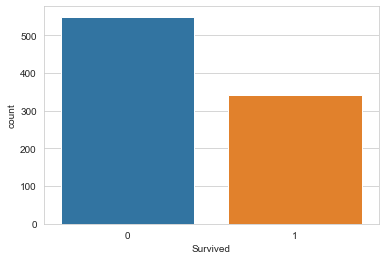

In [202]:
print(train['Survived'].value_counts())
print(train['Survived'].value_counts(normalize=True))
sns.countplot(x='Survived',data=train)

#we can say that we have somewhat balanced classification. Its not that skewed

**How many people survived in each batch**

In [203]:
train.groupby(by=["ticket batch"]).sum().reset_index()[['ticket batch','Survived']].head()

,ticket batch,Survived
0,batch-1,1
1,batch-10,0
2,batch-100,0
3,batch-102,0
4,batch-103,0


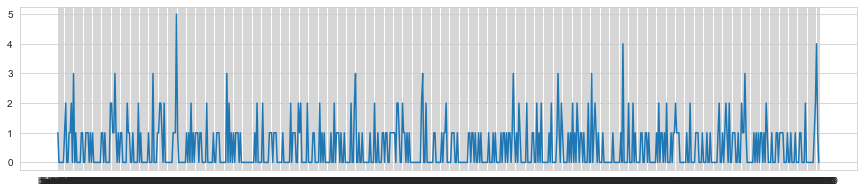

In [204]:
plt.figure(figsize=(15,3))
plt.plot(train.groupby(by=["ticket batch"]).sum()['Survived'])

**count plot on categorical columns based on survived/not survived** 

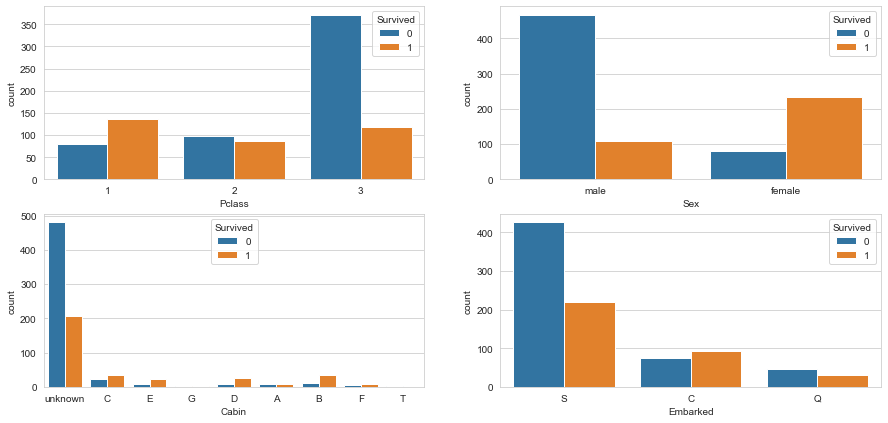

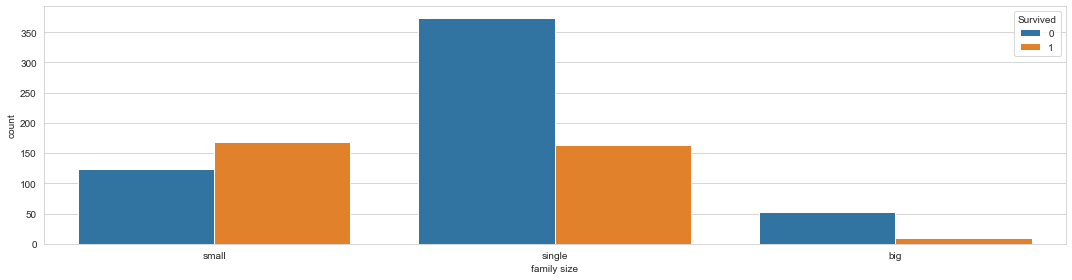

In [205]:
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(15, 7))
sns.countplot(x="Pclass",data=train,hue="Survived",ax=ax[0][0])
sns.countplot(x="Sex",data=train,hue="Survived",ax=ax[0][1])
sns.countplot(x="Cabin",data=train,hue="Survived",ax=ax[1][0])
sns.countplot(x="Embarked",data=train,hue="Survived",ax=ax[1][1])

fig2, ax2 =plt.subplots(nrows=1,ncols=1,figsize=(15, 4))
sns.countplot(x="family size",data=train,hue="Survived",ax=ax2)

fig.show()
fig2.show()
plt.tight_layout()

**pclass**: maximum people on board had 3rd class tickets and only a bunch of them survived(around 115 out of 435 approx). After people with 3rd class tickets, maximum people had 1st class tickets and quite of them were saved(around 135 out of 210 approx). Finally out of 185 people with 2nd class tickets about 100 of them were saved. Clearly people with 1st class and 2nd class were given more priority while rescuing.<br>
**sex**: again females were given more priority in the rescuing mission.<br>
**cabin**: most of the people who survived have no information about their cabins among those who have, people from cabin B and C survived the most.<br>
**embarked**: most people boarded from Southampton and then from Cherbourg and Queenstown.<br>
**family size**: most people onboard were travelling alone(no parents/children/spouses). After that a lot of people had small families(2-4 members) and then a few people came with big families(greater than 5 members). It seems that people with small families and singletons survived more. People with very big families were difficult to save 

**survived/not survived based on age and fare** 

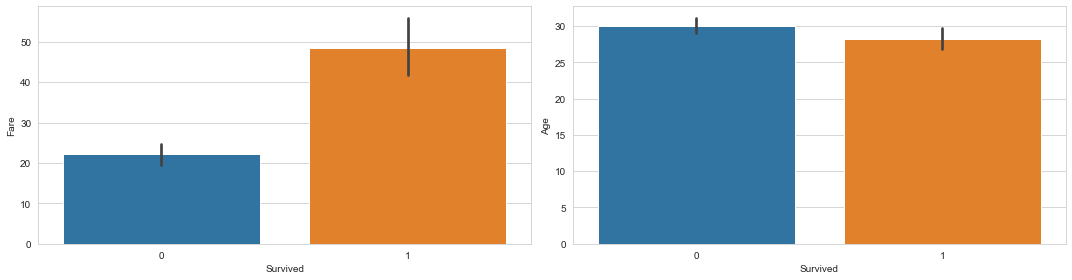

In [206]:
fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(15, 4))
sns.barplot(x="Survived",y="Fare",data=train,ax=ax[0])
sns.barplot(x="Survived",y="Age",data=train,ax=ax[1])

fig.show()
plt.tight_layout()

**fare**: As mentioned before people who survived on an average had more fare i.e upper class tickets(1st and 2nd class)<br>
**age**: The average age of people who survived and didnt survive are almost same. 27 and 30 respectively

**avg age of people who survived on the basis of their socio economic status,sex,cabin,family size and place where they embarked** 

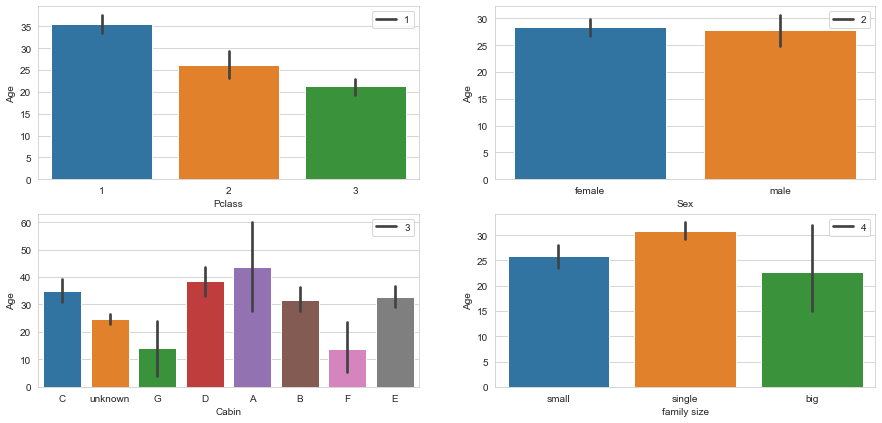

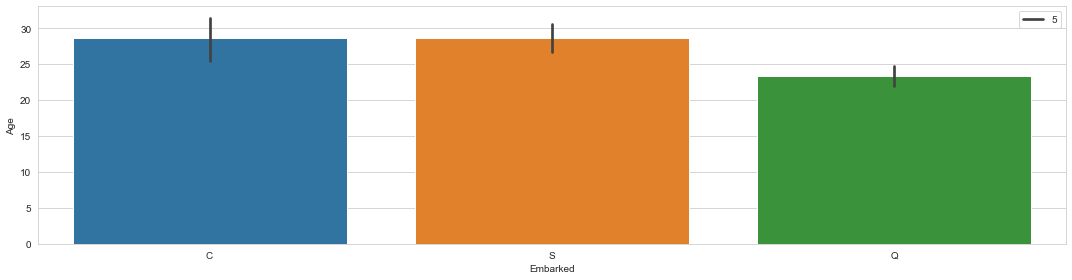

In [207]:
# avg age of people who survived, hue by pclass-sex-parch-sibsp
people_survived = train[train['Survived']==1]

fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(15, 7))
sns.barplot(x="Pclass",y="Age",data=people_survived,ax=ax[0][0])
sns.barplot(x="Sex",y="Age",data=people_survived,ax=ax[0][1])
sns.barplot(x="Cabin",y="Age",data=people_survived,ax=ax[1][0])
sns.barplot(x="family size",y="Age",data=people_survived,ax=ax[1][1])

ax[0][0].legend(labels="1")
ax[0][1].legend(labels="2")
ax[1][0].legend(labels="3")
ax[1][1].legend(labels="4")

fig2, ax2 =plt.subplots(nrows=1,ncols=1,figsize=(15, 4))
sns.barplot(x="Embarked",y="Age",data=people_survived,ax=ax2)
ax2.legend(labels="5")

fig.show()
fig2.show()
plt.tight_layout()

**fig1**: avg age of people with 1st class ticket is 35; 2nd class ticket is 26 and 3rd class ticket is 21 (approx.) People in the higher age groups tend to have better class tickets.<br>
**fig2**: avg age of male and female on board is same.<br>
**fig4**: avg age of people travelling alone is 31. It seems that people in the higher age groups are travelling alone.<br>
**fig5**: It seems that a lot of youngsters boarded from Queenstown.<br>

**avg fare of people who survived on the basis of their socio economic status,sex,cabin,family size and place where they embarked** 

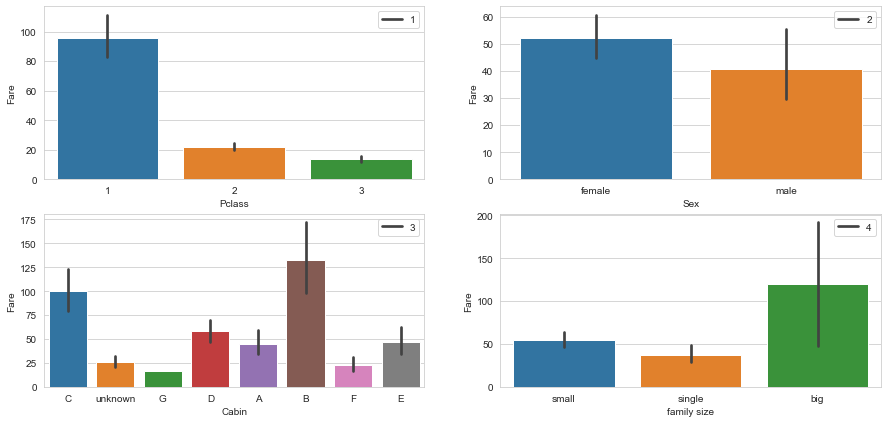

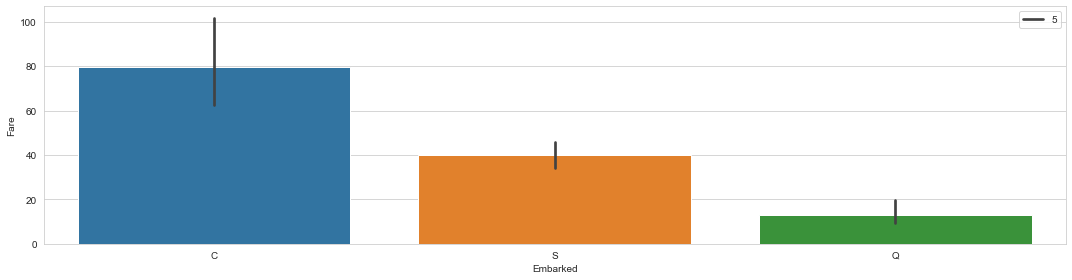

In [208]:
# avg fare of people who survived, hue by pclass-sex-parch-sibsp-embarked
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(15, 7))
sns.barplot(x="Pclass",y="Fare",data=people_survived,ax=ax[0][0])
sns.barplot(x="Sex",y="Fare",data=people_survived,ax=ax[0][1])
sns.barplot(x="Cabin",y="Fare",data=people_survived,ax=ax[1][0])
sns.barplot(x="family size",y="Fare",data=people_survived,ax=ax[1][1])

ax[0][0].legend(labels="1")
ax[0][1].legend(labels="2")
ax[1][0].legend(labels="3")
ax[1][1].legend(labels="4")

fig2, ax2 =plt.subplots(nrows=1,ncols=1,figsize=(15, 4))
sns.barplot(x="Embarked",y="Fare",data=people_survived,ax=ax2)
ax2.legend(labels="5")

fig.show()
fig2.show()
plt.tight_layout()

**fig1**: quite obviously, avg fare of class 1 ticket is more. However, it is surprising to see that avg fare b/w 2nd class and 3rd class ticket do not differ by a lot of money and class 1 ticket is expensive by a huge difference.<br>
**fig2**: avg fare for females passengers is more than male passengers.<br>
**fig4**: again avg fare of people with big families is more.<br>
**fig5**: avg fare for queenstown passengers is low. This seems is sync with the fact that a lot of youngsters boarded at queenstown

**Infants below 1 year** `

In [209]:
# age<1 how many in total, sibblings/spose?, parents?(if not then with nannys), hue by embarked,survive, avg fare?
print("Total no. of infants: "+str(len(train[train['Age']<1])))
train[train['Age']<1]

Total no. of infants: 7


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family size,ticket batch
78,1,2,male,0.83,29.0000,unknown,S,small,batch-607
305,1,1,male,0.92,151.5500,C,S,small,batch-177
469,1,3,female,0.75,19.2583,unknown,C,small,batch-720
644,1,3,female,0.75,19.2583,unknown,C,small,batch-720
755,1,2,male,0.67,14.5000,unknown,S,small,batch-877
803,1,3,male,0.42,8.5167,unknown,C,small,batch-557
831,1,2,male,0.83,18.7500,unknown,S,small,batch-498


**All the infants were saved. Looking at this it seems that women and children were given higher priority while rescuing** 

# analyzing outliers in age and fare column

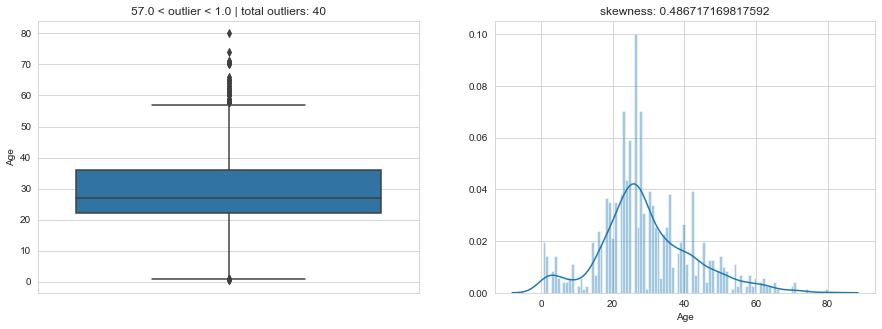

In [210]:
Q1 = np.percentile(a=train['Age'], q=25)
Q3 = np.percentile(a=train['Age'], q=75)

IQR = Q3 - Q1
ul = Q3+(1.5*IQR) 
ll = Q1-(1.5*IQR)
total = len(train[(train['Age']>ul) | (train['Age']<ll)])

fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
sns.boxplot(y='Age',data=train,ax=ax[0]).set_title(str(ul)+' < outlier < '+str(ll)+' | total outliers: '+str(total))
sns.distplot(train['Age'],bins=100,ax=ax[1]).set_title("skewness: "+str(train['Age'].skew()))

plt.show()

ages less than 1 are considered outliers i.e all new borns are considered as outliers

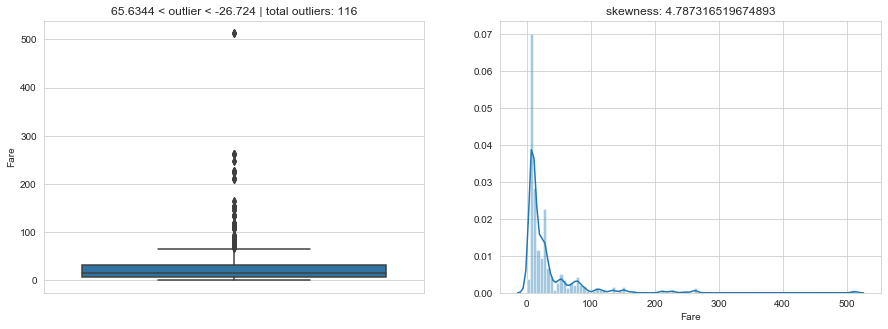

In [211]:
Q1 = np.percentile(a=train['Fare'], q=25)
Q3 = np.percentile(a=train['Fare'], q=75)

IQR = Q3 - Q1
ul = Q3+(1.5*IQR) 
ll = Q1-(1.5*IQR)
total = len(train[(train['Fare']>ul) | (train['Fare']<ll)])

fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
sns.boxplot(y='Fare',data=train,ax=ax[0]).set_title(str(ul)+' < outlier < '+str(ll)+' | total outliers: '+str(total))
sns.distplot(train['Fare'],bins=100,ax=ax[1]).set_title("skewness: "+str(train['Fare'].skew()))

plt.show()

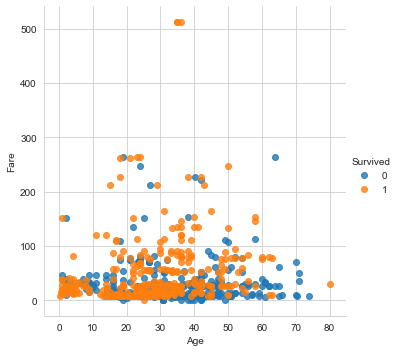

In [212]:
sns.lmplot(x="Age",y="Fare",data=train,fit_reg=False,hue="Survived")

There are some extreme values in these two columns but as we can see that passengers with lesser ages were given more priority.
Likewise we can see most of the people who have higher fare prices survived.<br>If you look at the children below 1; all of them survived.<br> Hence, we can conclude that the outliers in this dataset are a natural part of the dataset and should not be removed or imputed

# Preparing our columns for modelling

merging and encoding

In [213]:
target = train["Survived"] #target variable
merge1 = train.drop(['Survived'],axis=1)

In [214]:
merge2 = test.drop(['PassengerId'],axis=1)

In [215]:
merged = merge1.append(merge2)
merged

,Pclass,Sex,Age,Fare,Cabin,Embarked,family size,ticket batch
0,3,male,22.000000,7.2500,unknown,S,small,batch-303
1,1,female,38.000000,71.2833,C,C,small,batch-668
2,3,female,26.000000,7.9250,unknown,S,single,batch-743
3,1,female,35.000000,53.1000,C,S,small,batch-167
4,3,male,35.000000,8.0500,unknown,S,single,batch-324
...,...,...,...,...,...,...,...,...
413,3,male,26.574766,8.0500,unknown,S,single,batch-106
414,1,female,39.000000,108.9000,C,C,single,batch-395
415,3,male,38.500000,7.2500,unknown,S,single,batch-735
416,3,male,26.574766,8.0500,unknown,S,single,batch-486


In [216]:
merged.info()
#converting all categorical columns to datatype category in both train and test set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Pclass          1309 non-null int64
Sex             1309 non-null object
Age             1309 non-null float64
Fare            1309 non-null float64
Cabin           1309 non-null object
Embarked        1309 non-null object
family size     1309 non-null object
ticket batch    1309 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 92.0+ KB


In [217]:
for feature in merged.columns:
    if merged[feature].dtype == 'object':
        merged[feature] = merged[feature].astype('category')

In [218]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Pclass          1309 non-null int64
Sex             1309 non-null category
Age             1309 non-null float64
Fare            1309 non-null float64
Cabin           1309 non-null category
Embarked        1309 non-null category
family size     1309 non-null category
ticket batch    1309 non-null category
dtypes: category(5), float64(2), int64(1)
memory usage: 96.5 KB


**sex column**:onehot encode<br>
**ticket batch column**:label encode<br>
**cabin column**:onehot encode<br>
**embarked column**:onehot encode<br>
**family size column**:label encode<br>

In [219]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

merged['ticket batch'] = enc.fit_transform(merged['ticket batch'])

labelencoding_familysize = {"family size":{"single":0, "small":1, "big":2}}
merged=merged.replace(labelencoding_familysize)

In [220]:
onehot_encoding=["Sex","Cabin","Embarked"]
merged=pd.get_dummies(merged, columns=onehot_encoding, drop_first=True)

In [221]:
merged

,Pclass,Age,Fare,family size,ticket batch,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_unknown,Embarked_Q,Embarked_S
0,3,22.000000,7.2500,1,227,1,0,0,0,0,0,0,0,1,0,1
1,1,38.000000,71.2833,1,631,0,0,1,0,0,0,0,0,0,0,0
2,3,26.000000,7.9250,0,715,0,0,0,0,0,0,0,0,1,0,1
3,1,35.000000,53.1000,1,75,0,0,1,0,0,0,0,0,0,0,1
4,3,35.000000,8.0500,0,250,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,26.574766,8.0500,0,8,1,0,0,0,0,0,0,0,1,0,1
414,1,39.000000,108.9000,0,328,0,0,1,0,0,0,0,0,0,0,0
415,3,38.500000,7.2500,0,706,1,0,0,0,0,0,0,0,1,0,1
416,3,26.574766,8.0500,0,429,1,0,0,0,0,0,0,0,1,0,1


scaling - since age fare and ticket batch are on very different scales

In [222]:
from sklearn.preprocessing import MinMaxScaler
our_cols = merged.columns
merged_scaled = pd.DataFrame(MinMaxScaler().fit_transform(merged))
merged_scaled.columns = our_cols

merged_scaled

,Pclass,Age,Fare,family size,ticket batch,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_unknown,Embarked_Q,Embarked_S
0,1.0,0.273456,0.014151,0.5,0.244612,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.473882,0.139136,0.5,0.679957,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.323563,0.015469,0.0,0.770474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.436302,0.103644,0.5,0.080819,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.436302,0.015713,0.0,0.269397,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1.0,0.330762,0.015713,0.0,0.008621,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1305,0.0,0.486409,0.212559,0.0,0.353448,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1306,1.0,0.480145,0.014151,0.0,0.760776,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1307,1.0,0.330762,0.015713,0.0,0.462284,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


seperating out testset

In [223]:
features = merged_scaled[0:891]
testset = merged_scaled[891:]

# Modeling

**Logistic regression model**

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

lr = LogisticRegression()
lrscores = cross_val_score(lr, features, target, cv=5)
print(lrscores)
print("avg performance: "+str(lrscores.mean()))

[0.77653631 0.81005587 0.79213483 0.78651685 0.82485876]
avg performance: 0.798020524245271


**knn**

In [225]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
knnscores = cross_val_score(knn, features, target, cv=5)
print(knnscores)
print("avg performance: "+str(knnscores.mean()))

[0.73743017 0.77094972 0.80898876 0.79213483 0.84180791]
avg performance: 0.790262278675659


lets see if we can find the optimum k

In [226]:
expected_k = list(range(1,45,2))
scores=[]
for k in expected_k:
    knn2 = KNeighborsClassifier(n_neighbors=k,weights = 'distance')
    knn2scores = cross_val_score(knn, features, target, cv=5)
    scores.append(knn2scores.mean())
    
pd.DataFrame({"k":expected_k,"avg_score":scores})

,k,avg_score
0,1,0.790262
1,3,0.790262
2,5,0.790262
3,7,0.790262
4,9,0.790262
5,11,0.790262
6,13,0.790262
7,15,0.790262
8,17,0.790262
9,19,0.790262


on an average the accuracy for the knn model will be around 78 and 79

**Decision Trees**

In [227]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
dtscores = cross_val_score(dt, features, target, cv=5)
print(dtscores)
print("avg performance: "+str(dtscores.mean()))

[0.74301676 0.77094972 0.76966292 0.73033708 0.80225989]
avg performance: 0.7632452734905154


**Random Forest**

In [228]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 70, random_state=100,max_features="sqrt")
rfscores = cross_val_score(rfcl, features, target, cv=5)
print(rfscores)
print("avg performance: "+str(rfscores.mean()))

[0.79329609 0.79888268 0.83707865 0.82022472 0.85310734]
avg performance: 0.8205178972738011


lets see how the random forest is weighing the features

In [229]:
rfcl.fit(features,target)
pd.DataFrame(index=features.columns,data=rfcl.feature_importances_)

,0
Pclass,0.069703
Age,0.190648
Fare,0.174093
family size,0.048308
ticket batch,0.181625
Sex_male,0.236563
Cabin_B,0.007247
Cabin_C,0.005618
Cabin_D,0.007609
Cabin_E,0.011104


Random forests so far has given the finest result. Lets find the optimum parameters for the random forest model and use the final model to predict the test set

In [230]:
mxdpth = [4,6,7,8,10,12,14]
mxfeat = ["sqrt",6,8,10]
mn_smp_leaf = [1,3,5]

In [231]:
d={'max_depth':[],'max_features':[],'minimum_sample_leaf':[],"avgscore":[]}

for md in mxdpth:
    for mf in mxfeat:
        for msl in mn_smp_leaf:
            d['max_depth'].append(md)
            d['max_features'].append(mf)
            d['minimum_sample_leaf'].append(msl)
            model = RandomForestClassifier(n_estimators = 70, random_state=100, max_features=mf, min_samples_leaf=msl, max_depth=md )
            score = cross_val_score(model, features, target, cv=5)
            d['avgscore'].append(score.mean())    

In [232]:
models = pd.DataFrame(d)
models

,max_depth,max_features,minimum_sample_leaf,avgscore
0,4,sqrt,1,0.814862
1,4,sqrt,3,0.810424
2,4,sqrt,5,0.817134
3,4,6,1,0.812602
4,4,6,3,0.810355
...,...,...,...,...
79,14,8,3,0.823895
80,14,8,5,0.823857
81,14,10,1,0.827253
82,14,10,3,0.824974


In [233]:
models[models['avgscore'] == models['avgscore'].max()]

,max_depth,max_features,minimum_sample_leaf,avgscore
57,10,10,1,0.831741


**We choose random forest model with the following parameters to be the final model:**

In [236]:
final_model = RandomForestClassifier(n_estimators=70, random_state=100, max_features=10, min_samples_leaf=1, max_depth=10)
final_model.fit(features,target)
final_predictions = final_model.predict(testset)
final_predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [237]:
submit=pd.read_csv('test.csv')
submit["Survived"] = final_predictions
submit = submit[['PassengerId','Survived']]
#submit.to_csv('submission.csv',index=False) 
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
